In [1]:
# 모듈 호출
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import collections
import itertools
from wordcloud import WordCloud

In [2]:
# 빅카인즈에서 '깃대종(flagship species)'이 언급된 기사
df = pd.read_csv('https://raw.githubusercontent.com/osgeokr/textmining/master/bigkinds_flagship_species.csv',
                 index_col='일자', parse_dates=True)
df.head(1)

,뉴스 식별자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출,본문,URL,분석제외 여부
일자,,,,,,,,,,,,,,,,,,
2019-06-28,1.100201e+06,국민일보,제주=주미령 기자,‘구상나무’ ‘산굴뚝나비’ 한라산국립공원 대표 생물종,지역>지역일반,NaN,NaN,NaN,NaN,NaN,이창호,"한반도,한라산,한라산국립공원,제주","백록담,한라산국립공원관리소,세계자연보전연맹,선정위원회","구상나무,산굴뚝나비,생물종,한라산국립공원,대표,세계,유산,본부,한라산국립공원관리소,...","한라산국립공원관리소,한라산국립공원,한라산,산굴뚝나비,생물종,국립공원,구상나무,깃대종...",세계유산본부 한라산국립공원관리소는 한라산의 생태 문화 지리적 특성을 띤 대표 생물종...,http://news.kmib.co.kr/article/view.asp?arcid=...,NaN


In [3]:
# 단어/개수 딕셔너리
kw_dict = collections.Counter(itertools.chain.from_iterable(k.split(',') for k in df['키워드']))
kw_dict

Counter({'': 68,
         '음식물류': 1,
         '시추': 1,
         '쌍방향': 2,
         '헝겊': 1,
         '피스보트': 1,
         '검토': 37,
         '수평선': 2,
         '6~8': 1,
         '접시': 2,
         '무등산권': 7,
         '지느러미': 4,
         '9회': 1,
         '미지수': 2,
         '성탄절': 1,
         '집안': 4,
         '소녀': 2,
         '뻐꾹나리': 4,
         '자은사': 1,
         '귓구멍': 5,
         '태초': 1,
         '보호하': 1,
         '그림': 33,
         '대전발전': 1,
         '선정해': 1,
         '스키장': 10,
         'NGO': 11,
         '풍경들': 2,
         '홍수위': 1,
         '숲길': 32,
         '진도': 3,
         '울산광역시': 1,
         '열무': 1,
         '밤재': 1,
         '가랑': 1,
         '윷놀이대회': 2,
         '봄꽃': 15,
         '환경도서': 2,
         '난노피아': 1,
         '새만금길': 1,
         '내장사': 1,
         '서쯔': 1,
         '엄지손가락': 1,
         '오색': 63,
         '도립공원위원회': 3,
         '대기오염물질': 1,
         '경치': 5,
         '5도': 3,
         '계룡호반새': 3,
         '영업비밀': 1,
         '진흙벌판': 1,
         '겨울산행': 4,

In [4]:
# 단어/개수 데이터프레임
kw_df = pd.DataFrame(list(kw_dict.items()),columns = ['word','count'])
kw_df.sort_values(by=['count'], ascending=False).head(20)

,word,count
16992,깃대종,2133
851,생태,1421
15850,지역,1055
10739,복원,1044
22757,서식,956
20615,환경,905
21490,식물,811
13285,사업,781
9793,국립공원,759
15511,생태계,734


In [5]:
# Seaborn 설정
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)

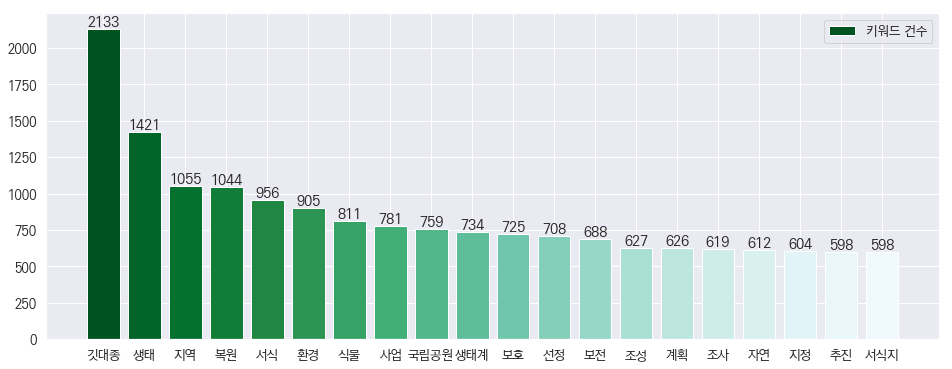

In [6]:
# 상위 20개
kw_df = kw_df.sort_values(by=['count'], ascending=False).head(20)

# 색상 팔레트 적용
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(kw_df['word'], kw_df['count'], color=sns.color_palette("BuGn_r", kw_df['word'].size))
for rect in rects:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
ax.set_xticks(kw_df['word'])
ax.legend(['키워드 건수'], loc='upper right')
plt.show()

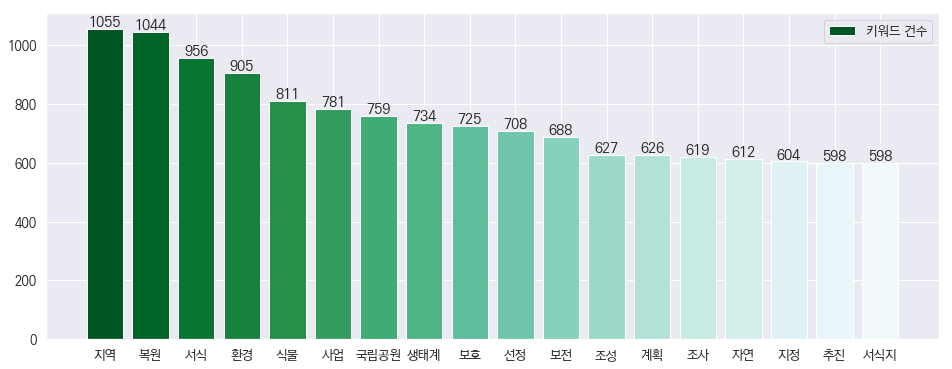

In [7]:
# 깃대종, 생태 키워드 제외
kw_df = kw_df[kw_df['word'].isin(["깃대종", "생태"])==False].sort_values(by=['count'],
                                                                    ascending=False).head(20)

# 색상 팔레트 적용
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,1,1)
rects = ax.bar(kw_df['word'], kw_df['count'], color=sns.color_palette("BuGn_r", kw_df['word'].size))
for rect in rects:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
ax.set_xticks(kw_df['word'])
ax.legend(['키워드 건수'], loc='upper right')
plt.show()

In [8]:
# 딕셔너리를 데이터프레임으로 변환
# data = dict(zip(kw_df['word'].tolist(), kw_df['count'].tolist()))
# print(data)
data = kw_dict

In [9]:
# 워드클라우드 정의
font_path = 'c:/Windows/Fonts/KoPubDotumBold.ttf'
wordcloud = WordCloud(font_path=font_path,
                      width=800, height=800,
                      max_words=200,
                      background_color="white").generate_from_frequencies(data)
array = wordcloud.to_array()

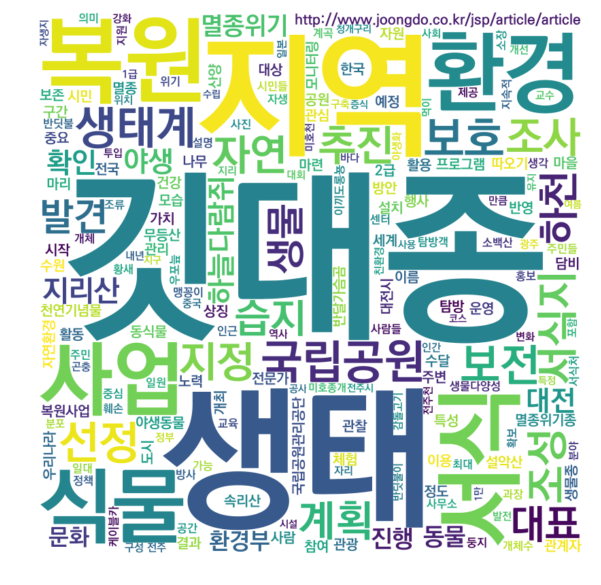

In [10]:
# 워드클라우드 플롯
fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('D:/GEODATA/워드클라우드.png', bbox_inches='tight')
plt.show()

In [11]:
# 깃대종, 생태 키워드 제외
stopwords = ["깃대종", "생태"]
[data.pop(stopword) for stopword in stopwords]

[2133, 1421]

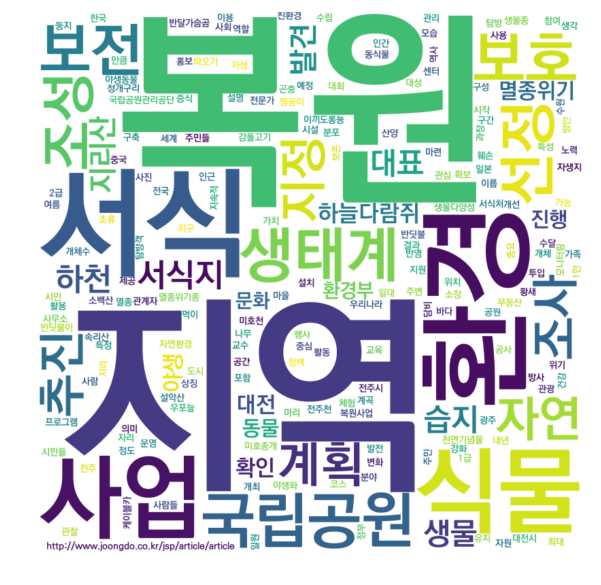

In [12]:
# 워드클라우드 정의
font_path = 'c:/Windows/Fonts/KoPubDotumBold.ttf'
wordcloud = WordCloud(font_path=font_path,
                      width=800, height=800,
                      max_words=200,
                      background_color="white").generate_from_frequencies(data)
array = wordcloud.to_array()

# 워드클라우드 플롯
fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('D:/GEODATA/워드클라우드.png', bbox_inches='tight')
plt.show()